In [278]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.impute import SimpleImputer

In [279]:
# Data Loading
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"
df = pd.read_csv(url, sep = ' ', header = None)
df.shape

(1567, 590)

In [280]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,0.0167,...,0.0052,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
6,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,-0.0270,...,NaN,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077
7,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5153,0.0157,...,0.0063,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310
8,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5358,0.0111,...,0.0045,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525
9,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5381,0.0159,...,0.0073,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294


In [281]:
df.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
1557,3072.10,2534.87,2177.4333,2945.8855,1.3321,100.0,83.1700,0.1253,1.4359,-0.0114,...,0.0023,26.7330,0.5010,0.0132,0.0035,2.6249,0.0277,0.0074,0.0023,26.7330
1558,3012.30,2466.84,2217.4111,1032.2836,1.4802,100.0,101.3511,0.1195,1.3832,0.0042,...,0.0054,176.6783,0.4993,0.0130,0.0037,2.5976,0.0097,0.0172,0.0054,176.6783
1559,3076.33,2456.13,2217.4111,1032.2836,1.4802,100.0,101.3511,0.1195,1.3120,-0.0043,...,0.0057,117.4564,0.4960,0.0157,0.0036,3.1743,0.0150,0.0176,0.0057,117.4564
1560,2770.40,2549.42,2204.2889,2637.9989,1.5549,100.0,86.1089,0.1234,1.2811,0.0037,...,0.0042,127.3154,0.5009,0.0155,0.0036,3.0997,0.0105,0.0133,0.0042,127.3154
1561,2951.14,2326.59,2212.6334,1081.5662,1.0096,100.0,113.4278,0.1253,1.4492,-0.0134,...,0.0051,46.4573,0.4965,0.0118,0.0032,2.3817,0.0320,0.0148,0.0051,46.4573
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941
1566,2944.92,2450.76,2195.4444,2914.1792,1.5978,100.0,85.1011,0.1235,NaN,NaN,...,0.0045,137.7844,0.4987,0.0181,0.0040,3.6275,0.0117,0.0162,0.0045,137.7844


590 sensor signals collected from the wafer fabrication line.
1567 rows (wafers being manufactured) and 590 columns (sensor readings).

In [282]:
# Save the data to csv
path = os.path.join(os.path.dirname(os.getcwd()), "data", "raw")
data_path = os.path.join(path, "secom_labels.data")
print(data_path)

/home/local-host/PycharmProjects/secom-dimensionality-reduction/data/raw/secom_labels.data


## EXPLANATORY DATA ANALYSIS AND DATA PRE-PROCESSING

In [283]:
# Data quality check
df.isnull().sum()

0       6
1       7
2      14
3      14
4      14
       ..
585     1
586     1
587     1
588     1
589     1
Length: 590, dtype: int64

We are assuming that the Nan values are simply attributed to sensors that were off or those that barely ever fired.

- Since the dataset represents a simple pass/fail classification corresponding to each row in the dataset where -1  corresponds to a pass and 1 corresponds to a fail.
- Additionally, a datetime stamp for each pass/fail is provided in the labels file corresponding to a selected functionality test.
- Thus, a major question, if the data is consistent in time then it should be treated as time-series or not,it is important to know that a time series data should maintain a temporal order.


In [284]:
column_names = ["Pass/Fail", "Time"]
label_data = pd.read_csv(data_path, sep = ' ', header = None, names = column_names)
label_data.head(10)

,Pass/Fail,Time
0,-1,19/07/2008 11:55:00
1,-1,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00
3,-1,19/07/2008 14:43:00
4,-1,19/07/2008 15:22:00
5,-1,19/07/2008 17:53:00
6,-1,19/07/2008 19:44:00
7,-1,19/07/2008 19:45:00
8,-1,19/07/2008 20:24:00
9,-1,19/07/2008 21:35:00


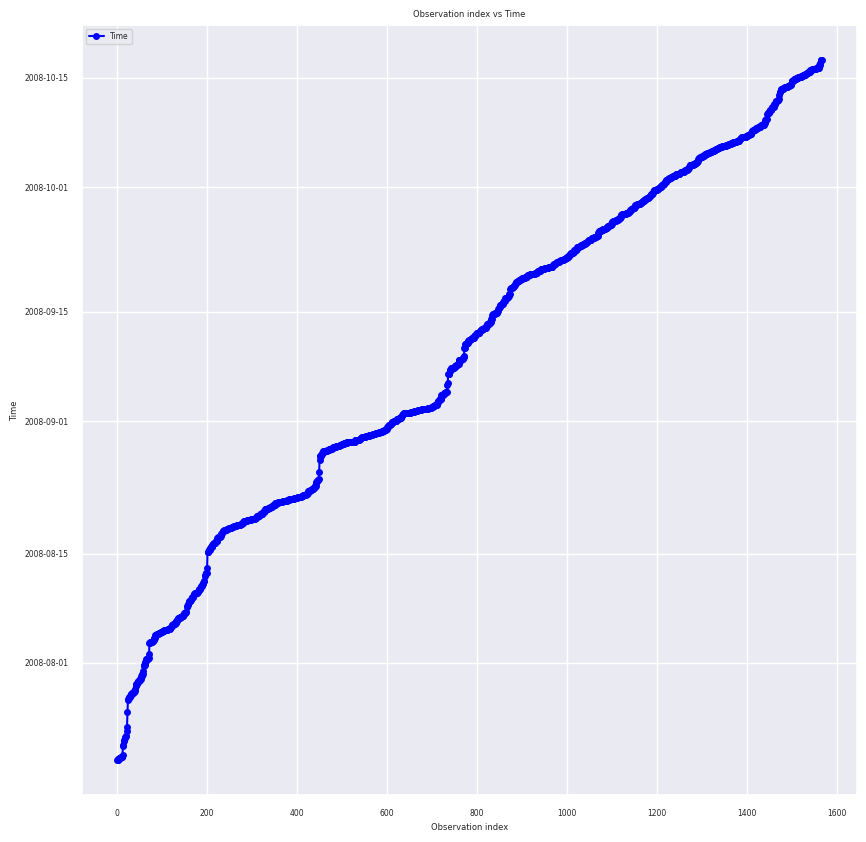

In [285]:
# Checking if there is chronological variations in timestamps
label_data["Time"] = pd.to_datetime(label_data["Time"], dayfirst = True)
# Creating a time lag column
label_data["Time_lag"] = label_data["Time"].shift(1)
# Calculate the differences and find the jump
label_data["Time_difference"] = label_data["Time"] - label_data["Time_lag"]
backward_jumps = label_data[label_data["Time_difference"] < pd.Timedelta(0)]    # This basically filters the dataframe to include only the rows where the time difference was negative

# Create a plot to visualize that
plt.figure(figsize = (10,10))
plt.plot(df.index, label_data["Time"], label = "Time", marker = "o", color = "blue", linestyle = "-", markersize = 4)


# Loop through the backward jumps and annotate them
# A backward_jumps.index is just a list of row numbers where suspicious gaps were found.
for jump_index in backward_jumps.index:
    time_difference = backward_jumps.loc[jump_index, "Time_difference"]   # For the current suspicious row get the time difference so that we could annotate it in the plot
    plt.plot([jump_index - 1, jump_index], [label_data.loc[jump_index - 1, "Time"], label_data.loc[jump_index, "Time"]],
             color = "red", linestyle = "--", linewidth = 2)     # Ensure to highlight the jump with a red
    plt.annotate(f"{time_difference}", xy= (jump_index, label_data.loc[jump_index, "Time"]),
                 textcoords = "offset points", xytext = (0,10), ha = "center", color = "red")

plt.xlabel("Observation index")
plt.ylabel("Time")
plt.title("Observation index vs Time")
plt.legend(loc = "upper left")
plt.show()


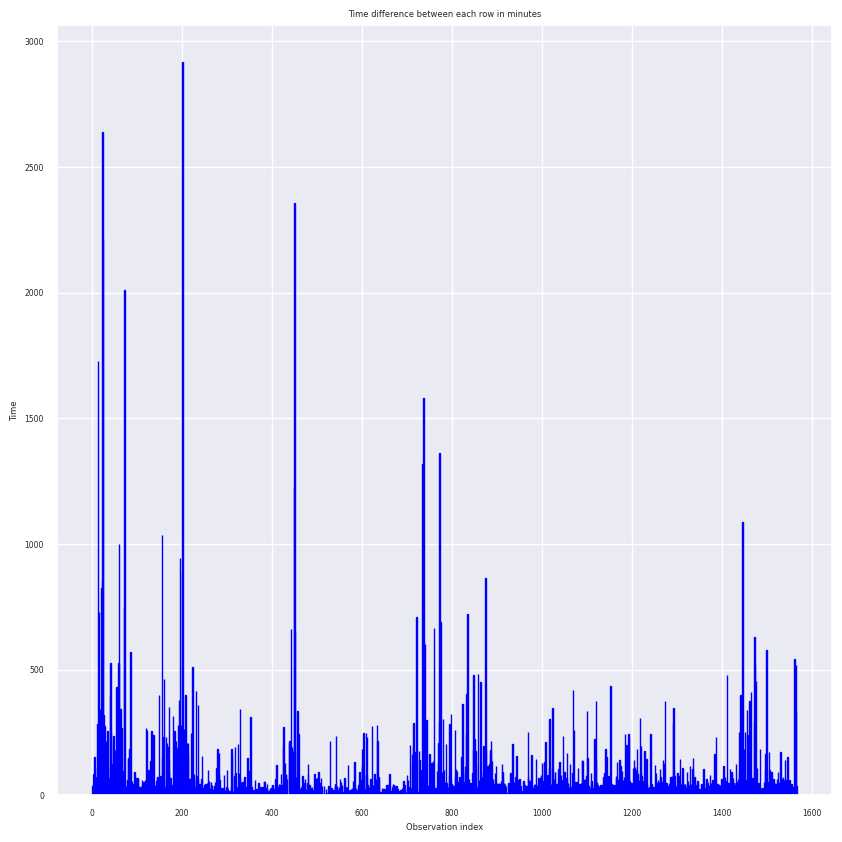

In [286]:
# Checking to see if the temporal time difference between each run is consistent
label_data["Time_difference_minutes"] = label_data["Time_difference"].dt.total_seconds()/60

# Create a more pronounced bar plot of the time difference in minutes
plt.figure (figsize = (10,10))
plt.bar(label_data.index, label_data["Time_difference_minutes"], label = "Time Difference", width = 1, color = "skyblue", edgecolor = "blue" )
plt.xlabel("Observation index")
plt.ylabel("Time")
plt.title("Time difference between each row in minutes")
plt.show()

## Graph Observations

1. Graph 1 "Observation index vs Time"
- The line goes straight up from left to right, no red lines indicating that there are or were no suspicious or backwards jumps detected, thus to mean that the data was never shuffled.
- The curve covers roughly July 2008 to October 2008, about 3 months of semiconductor manufacturing data.
- Notice the line is not perfectly straight, it's slightly uneven, with some steeper sections and some flatter ones. That tells you wafers weren't being tested at perfectly uniform intervals throughout the day. Some periods were busier than others.

2. Graph 2 "Time difference between each row in minutes"
- Most gaps are very small, the dense blue mass near the bottom suggests wafers were typically tested every few minutes during active production.
- But those tall spikes, some reaching 2000-3000 minutes (that's 33-50 hours!) — are overnight stops, weekends, or planned maintenance shutdowns. The factory simply wasn't running.

Conclusion
These giant gaps mean the process had natural breaks. Sensor behavior right after a long shutdown might differ from mid-production readings.
This could introduce subtle patterns in your data that PCA might pick up on.

Looking at the second graph we notice some temporal inconsistencies and a lot of factors like downtime, weekends etc thus treating each process as an independent event is more logical making the analysis to be focused on the conditions and sensor readings at the time of each test without time influence.


In [287]:
# Drop all time series related time
label_data.drop(columns= ["Time_difference", "Time_lag", "Time_difference_minutes","Time"], inplace=True)

In [288]:
# Combine the two dataframes to one side by side
df = pd.concat([label_data, df], axis = 1)
df.head(10)

,Pass/Fail,0,1,2,3,4,5,6,7,8,...,580,581,582,583,584,585,586,587,588,589
0,-1,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,-1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,1,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,-1,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,-1,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,-1,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,...,0.0052,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
6,-1,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,...,NaN,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077
7,-1,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5153,...,0.0063,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310
8,-1,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5358,...,0.0045,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525
9,-1,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5381,...,0.0073,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294


In [289]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [290]:

df.describe()

,Pass/Fail,0,1,2,3,4,5,6,7,8,...,580,581,582,583,584,585,586,587,588,589
count,1567.000000,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,...,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,-0.867262,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,0.498010,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,...,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,-1.000000,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,-1.000000,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,...,0.003400,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,-1.000000,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,-1.000000,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,...,0.006475,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,1.000000,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [291]:
# A constant feature is a column where each single row has the same value
# The standard deviation is 0 meaning there is no variation or whatsoever.
def constant_features(df):
    df_constant_col = [col for col in df.columns if df[col].std() == 0]
    return df[df_constant_col]
constant_columns = constant_features(df)
constant_columns.head(10)

,5,13,42,49,52,69,97,141,149,178,...,529,530,531,532,533,534,535,536,537,538
0,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


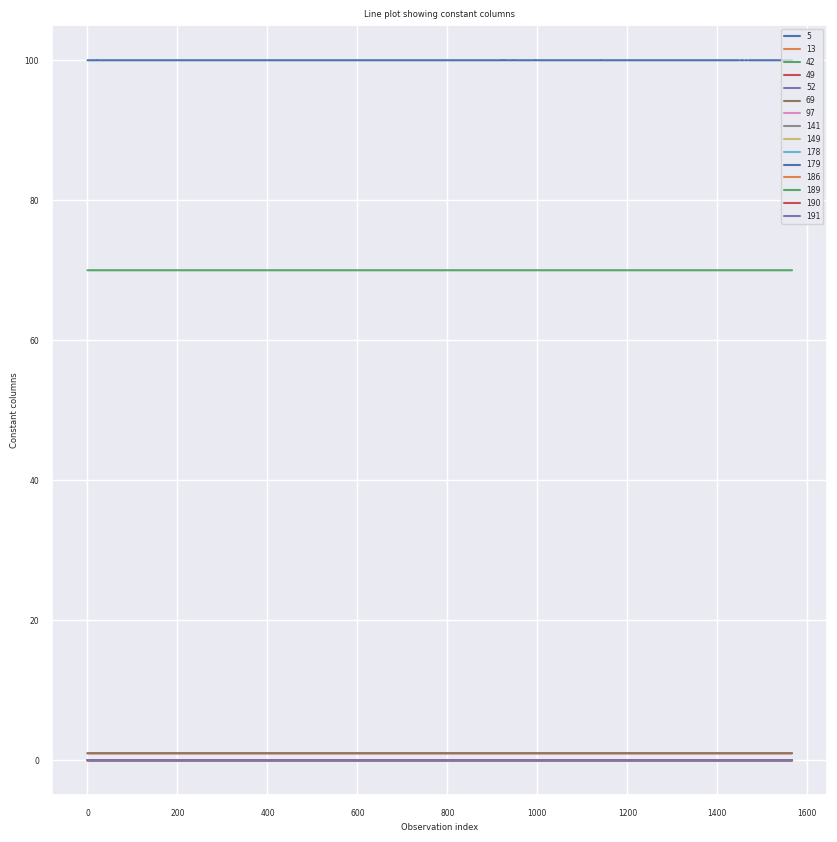

In [292]:
# Plotting a few constant features to assess their characteristics.
# Plot from the first one [0] to the 15th one [15]
columns_to_plot = constant_columns.columns[0:15]
# create a plot
plt.figure(figsize = (10,10))

for col in columns_to_plot:
    constant_columns[col].plot(label = col)

plt.xlabel("Observation index")
plt.ylabel("Constant columns")
plt.title("Line plot showing constant columns")
plt.legend(loc = "upper right")
plt.show()

- Every line in this plot is perfectly horizontal, not a single wiggle across all 1567 observations. That's the visual definition of a constant feature.
- There are essentially two groups of constants here:
    - The line sitting at 100: that's column 5. One sensor that was permanently pegged at 100.0 for every single wafer tested across the entire 3 month period. Completely stuck.
    - All the other lines sitting at or near 0:  columns 13, 42, 49, 52, 69, 97 and the rest. These sensors were permanently reading zero or near zero throughout the entire dataset.

#### What This Tells About the Factory
These sensors were either:

    - Broken: stuck at a fixed reading, not actually measuring anything
    - Irrelevant to this process: monitoring something that never changes during normal semiconductor manufacturing
    - Control/reference sensors: deliberately held constant as a baseline.

N/B: And since PCA finds directions of maximum variance a sensor that is stuck at one place has 0 variance thus can't point towards any directions it adds no important information, dropping them creates space and actually makes computation performance better.

Why do remove constant features?

1. If sensor 513 reads 100.0 for every single wafer — passed or failed — it contributes zero information about why a wafer passes or fails. It cannot discriminate between outcomes because it never changes.
2. For PCA specifically this is even more critical. PCA works by finding directions of maximum variance. A column with zero variance contributes nothing to any principal component.
3. It just adds noise and computational weight to the matrix operations. Removing it is purely beneficial.

A sensor stuck at 100.0 forever is either broken, measuring something irrelevant, or monitoring a deliberately fixed parameter.
If we split into train/test first, then check for constant columns, you might find that column X is constant in your training set but has slight variation in your test set.
Now we've dropped it from training, but it exists in test, the column counts don't match and your model breaks.

N/B: An alternative approach might have involved splitting the DataFrame into training and test sets prior to dropping these columns. However, this was deemed inappropriate because it could lead to inconsistencies. For instance, in an 80-20 train-test split, one subset might end up with constant values in a significant proportion of its columns (either 80% or 20%), leading to a mismatch in columns between the training and test sets. Such disparities can adversely affect model training and validation, thereby undermining the reliability of the analysis.

In [293]:
df.drop(columns = constant_columns.columns, inplace= True)

In [294]:
df.head(10)

,Pass/Fail,0,1,2,3,4,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,-1,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,-1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,1,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,-1,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,-1,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,-1,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5287,0.0167,...,0.0052,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
6,-1,3030.27,2430.12,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.5816,-0.0270,...,NaN,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077
7,-1,3058.88,2690.15,2248.9000,1004.4692,0.7884,106.2400,0.1185,1.5153,0.0157,...,0.0063,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310
8,-1,2967.68,2600.47,2248.9000,1004.4692,0.7884,106.2400,0.1185,1.5358,0.0111,...,0.0045,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525
9,-1,3016.11,2428.37,2248.9000,1004.4692,0.7884,106.2400,0.1185,1.5381,0.0159,...,0.0073,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294


In [295]:
df.shape

(1567, 475)

In [296]:
# Converting target variables to categorical variables
df["Pass/Fail"] = df["Pass/Fail"].replace(to_replace = -1, value = 0 )

In [297]:
df["Pass/Fail"].astype('category')

0       0
1       0
2       1
3       0
4       0
       ..
1562    0
1563    0
1564    0
1565    0
1566    0
Name: Pass/Fail, Length: 1567, dtype: category
Categories (2, int64): [0, 1]

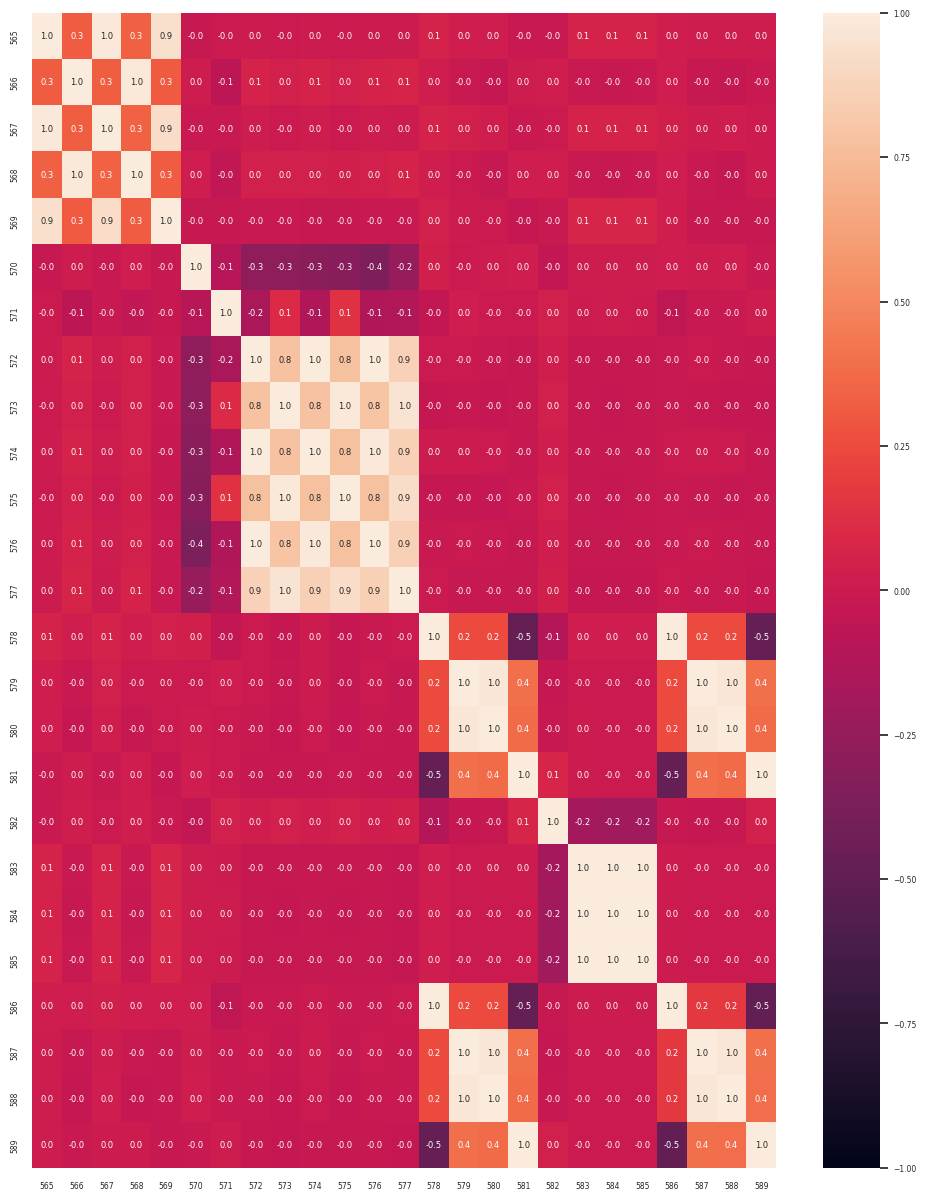

In [298]:
# Create a correlation matrix to know and see the correlation between variables
plt.figure(figsize = (12,15))
sns.set(font_scale = 0.5)
# Create a heat map
heatmap = sns.heatmap(df.iloc[:,450:].corr(), vmin = -1, vmax = 1, annot =True, fmt = ".1f")
plt.show()

Observation: Some features have a high correlation like 1 (multicolinearity) some aren't correlated to each other.

In [299]:
# Check for null columns
df.isnull().sum()

Pass/Fail     0
0             6
1             7
2            14
3            14
             ..
585           1
586           1
587           1
588           1
589           1
Length: 475, dtype: int64

There is some significant amount of null values which are in significant according to the  authors of the dataset thus we are going to drop them.

In [300]:
df = df.dropna(axis = 1)
print(df.shape)

(1567, 53)


### Importance of dropping before splitting the data
1. Consistency Across Datasets: By dropping columns before the split, you ensure that both the training and test datasets have the same set of features. This consistency is crucial because a model trained on a certain set of features expects the same features during testing and in production.

2. Avoiding Data Leakage: If you drop columns based on the null value threshold after splitting into training and test sets, there's a risk of introducing bias. For instance, if a column is dropped in the training set but not in the test set (or vice versa) due to different proportions of missing values, this can lead to discrepancies and potential data leakage.

In [301]:
# Splitting the data to training and testing sets.
X = df.drop(["Pass/Fail"], axis = 1)
y = df["Pass/Fail"]
# Stratify y : tells the split — preserve the exact ratio of passes to failures from the original dataset in both the training and test sets. Thus neither the test nor train will be imbalanced.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 42, stratify = y, shuffle = True)


### Objective
- We split the train and test data to prevent data leakage before manipulation.
- fit on X_train → then transform both X_train and X_test is to prevent data leakage fitting the imputer on the X_test is basically allowing information from the future to influence your model.
        - Makes the model give unrealistic performance, over optimistic and invalid.


Missing values were handled using a mean imputation strategy implemented through scikit-learn’s SimpleImputer to prevent data leakage and ensure consistent preprocessing across datasets.

In [302]:
imputer  = SimpleImputer(strategy = "mean")

In [303]:
# Fit it on training data only
imputer.fit(X_train)

,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'mean'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissing values at fit/train time, the feature won't appear onthe missing indicator even if there are missing values attransform/test time.",False
,"keep_empty_features keep_empty_features: bool, default=FalseIf True, features that consist exclusively of missing values when`fit` is called are returned in results when `transform` is called.The imputed value is always `0` except when `strategy=""constant""`in which case `fill_value` will be used instead... versionadded:: 1.2",False


In [307]:
# Transform the datasets
X_train = pd.DataFrame(imputer.transform(X_train), columns = X_train.columns)
x_test = pd.DataFrame(imputer.transform(X_test), columns = X_test.columns)

In [ ]:
# Checking for outliers


#### Scaling the data
Quick note: Ever had of scaling, normalizing, standardizing data and thought that was confusing.
Scaling basically means transforming data so that the features are in a comparable range.
Standardizing and normalizing are all ways of scaling data. A bit more specific though.

1. Standardizing - Where the mean is 0 and std = 1 (Z - Score Scaling)
    - It uses StandardScaler
    - Formula: (x - mean) /std
    - Best when the data has outliers or no clear boundary.
2. Normalizing - In a range of 0 - 1 (Min-Max scaling) uses the MinMaxScaler:
    - Formula: (x - min) / (max-min)
3. Robust scaling - Use median or IQR
    - It uses the RobustScaler()
    - Best when the data has a lot of outliers as they won't skew the scaling.